In [24]:
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn.feature_selection import VarianceThreshold  # 导入python的相关模块
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score as ACCS
import pandas as pd
from sklearn import tree
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score

# open up a datastore
store = pd.HDFStore('train_data.h5')
store1 = pd.HDFStore('test_data.h5')
# Get the feature matrix (samples and their features)
feature_matrix_dataframe = store['rpkm']  # train的数据框架
feature_matrix_dataframe_test = store1['rpkm']  # test的数据框架

all_in = pd.concat([feature_matrix_dataframe, feature_matrix_dataframe_test], axis=0, join='inner')

name = all_in.index.values  # 提取行标签

data = all_in.values  # 提取数据丢掉标签（总和数据）
sel = VarianceThreshold(threshold=20)  # 表示剔除特征的方差大于阈值15的feature
new = sel.fit_transform(data)  # 返回的结果为选择的特征矩阵
new_all = pd.DataFrame(new, index=name)  # 得到只剩下feature的新数据
a = new_all.iloc[:5, 3]
new_train = new_all.iloc[:21389, ]  # 新的train数据
new_test = new_all.iloc[21389:, ]  # 新的test数据

# 注意，新数据的gene序列（columns）被抹掉了，但是这不重要
# 唯一的问题是所有的数据一起提取方差了





In [25]:
pca = decomposition.PCA(n_components=50)
new_train_afterPCA = pca.fit_transform(new_train.values)
new_test_afterPCA = pca.transform(new_test.values)
# 降维
new_train_afterPCA_da = pd.DataFrame(new_train_afterPCA, index=new_train.index.values)
new_test_afterPCA_da = pd.DataFrame(new_test_afterPCA, index=new_test.index.values)

labels_series1 = store1['labels']
l1 = labels_series1.values  # l1是test data
# print(l1)
# print(type(l1))
# print(l1.shape)
labels_series = store['labels']
l = labels_series.values  # l是train data



In [26]:
clf = RandomForestClassifier(min_samples_leaf=55, n_estimators=150, max_depth=30, n_jobs=2, random_state=0)

clf.fit(new_train_afterPCA_da, l)
# print(new_test_afterPCA_da)
# print(type(new_test_afterPCA_da))
# print(new_test_afterPCA_da.shape)

pred_rfc = clf.predict(new_test_afterPCA_da)

# print(pred_rfc)
# print(type(pred_rfc))
# print(pred_rfc.shape)

score = ACCS(l1, pred_rfc)
print("Accuracy_Score: " + str(score))


Accuracy_Score: 0.43117338003502625


Confusion matrix, without normalization
[[ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 39  0]
 [ 0  0  0 ...  0  0  0]]
Normalized confusion matrix
[[0.   0.   0.   ... 1.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [0.   0.   0.   ... 0.   0.93 0.  ]
 [ nan  nan  nan ...  nan  nan  nan]]
0 43 1.0
1 3 0.75
3 3 0.6061452513966481
7 14 0.7272727272727273
20 20 0.9722222222222222
23 23 0.7283236994219653
24 24 1.0
30 37 0.6240601503759399
32 26 0.5333333333333333
35 23 0.5526315789473685
36 36 0.64
40 22 0.7839506172839507
42 42 0.6371681415929203
44 44 0.9285714285714286


c:\users\sheaw\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


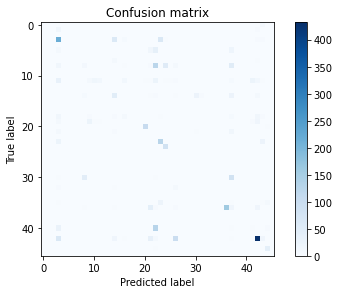

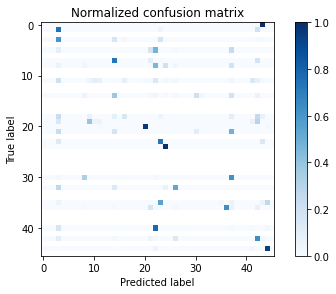

In [38]:
# #labels表示你不同类别的代号，比如这里的demo中有13个类别
# labels = ['A', 'B', 'C', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']


cell_labels=[]
for item in labels_series.values:
    if item in cell_labels:
        continue
    else:
        cell_labels.append(item)

# print(cell_labels)
# labelss = pd.read_csv('cell_type.csv', index_col=False).values

'''
具体解释一下re_label.txt和pr_label.txt这两个文件，比如你有100个样本
去做预测，这100个样本中一共有10类，那么首先这100个样本的真实label你一定
是知道的，一共有10个类别，用[0,9]表示，则re_label.txt文件中应该有100
个数字，第n个数字代表的是第n个样本的真实label（100个样本自然就有100个
数字）。
同理，pr_label.txt里面也应该有1--个数字，第n个数字代表的是第n个样本经过
你训练好的网络预测出来的预测label。
这样，re_label.txt和pr_label.txt这两个文件分别代表了你样本的真实label和预测label，然后读到y_true和y_pred这两个变量中计算后面的混淆矩阵。当然，不一定非要使用这种txt格式的文件读入的方式，只要你最后将你的真实
label和预测label分别保存到y_true和y_pred这两个变量中即可。
'''
y_true = l1
y_pred = pred_rfc
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    # tick_marks = np.arange(len(labelss))
    # plt.xticks(tick_marks, labelss, rotation=45)
    # plt.yticks(tick_marks, labelss)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=cell_labels)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

[rows, cols] = cm_normalized.shape

for i in range(rows):
    for j in range(cols):
        if cm_normalized[i, j] > 0.5:
            print(i, j , cm_normalized[i, j])

plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.savefig('confusion_matrix.png', format='png')
plt.show()


In [28]:
print(np.sum(cm_normalized, axis=1))


print()
print()

[ 1.  1. nan  1. nan  1. nan  1.  1. nan nan  1. nan nan  1. nan nan nan
  1.  1.  1.  1. nan  1.  1. nan nan nan nan nan  1. nan  1. nan nan  1.
  1. nan nan nan  1. nan  1. nan  1. nan]




In [29]:
np.sum(cm_normalized, axis=1)

array([ 1.,  1., nan,  1., nan,  1., nan,  1.,  1., nan, nan,  1., nan,
       nan,  1., nan, nan, nan,  1.,  1.,  1.,  1., nan,  1.,  1., nan,
       nan, nan, nan, nan,  1., nan,  1., nan, nan,  1.,  1., nan, nan,
       nan,  1., nan,  1., nan,  1., nan])

In [42]:
print(np.max(cm_normalized,axis=1)) #每列最大
print(np.argmax(cm_normalized, axis=1))#每列最大的元素的位置

print(np.where(cm_normalized==np.max(cm_normalized, axis=1)))

[1.   0.75  nan 0.61  nan 0.47  nan 0.73 0.46  nan  nan 0.2   nan  nan
 0.38  nan  nan  nan 0.25 0.4  0.97 0.48  nan 0.73 1.    nan  nan  nan
  nan  nan 0.62  nan 0.53  nan  nan 0.55 0.64  nan  nan  nan 0.78  nan
 0.64  nan 0.93  nan]
[43  3  0  3  0 22  0 14 22  0  0  3  0  0 14  0  0  0 42  9 20 37  0 23
 24  0  0  0  0  0 37  0 26  0  0 23 36  0  0  0 22  0 42  0 44  0]
(array([ 3, 14, 20, 23, 24, 36, 42, 44], dtype=int64), array([ 3, 14, 20, 23, 24, 36, 42, 44], dtype=int64))


In [ ]:
store.close()
store1.close()